In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_sales = pd.read_csv('../data/sales_train_v2.csv')

# Correct the date

The date is in the format day-month-year.  Pandas will use month-day-year by default unless the month is greater than 12, in which case it defaults to day-month year.  We must therefore specify day-month-year otherwise the date will be converted differently depending on the date in the 'date' column.

In [3]:
# make date-time format use day first
df_sales['date'] = pd.to_datetime(df_sales['date'],  dayfirst=True)

# Create dataframe of most sold items

In [4]:
# find the most sold items
df_sales_totalitem = df_sales.groupby(['item_id'])['item_cnt_day'].sum().reset_index(name='item_cnt_total')
df_sales_totalitem = df_sales_totalitem.sort_values(by='item_cnt_total',ascending=False)
df_sales_totalitem.head(10)

,item_id,item_cnt_total
20602,20949,187642.0
2749,2808,17245.0
3654,3732,16642.0
17418,17717,15830.0
5717,5822,14515.0
3656,3734,11688.0
6543,6675,10289.0
3653,3731,10099.0
1814,1855,10032.0
16493,16787,9227.0


# Plot of 10 Most Sold Items

In [5]:
num_of_items_to_plot = 10

# first create a dataframe with only the items that will be plotted to save memory and CPU
df_sales_day = df_sales.groupby(['item_id','date'])['item_cnt_day'].sum().reset_index(name='item_cnt_day_total')
df_sales_day['item_id'].isin(df_sales_totalitem['item_id'])
df_sales_day = df_sales_day.loc[df_sales_day['item_id'].isin(df_sales_totalitem['item_id'].head(num_of_items_to_plot))]

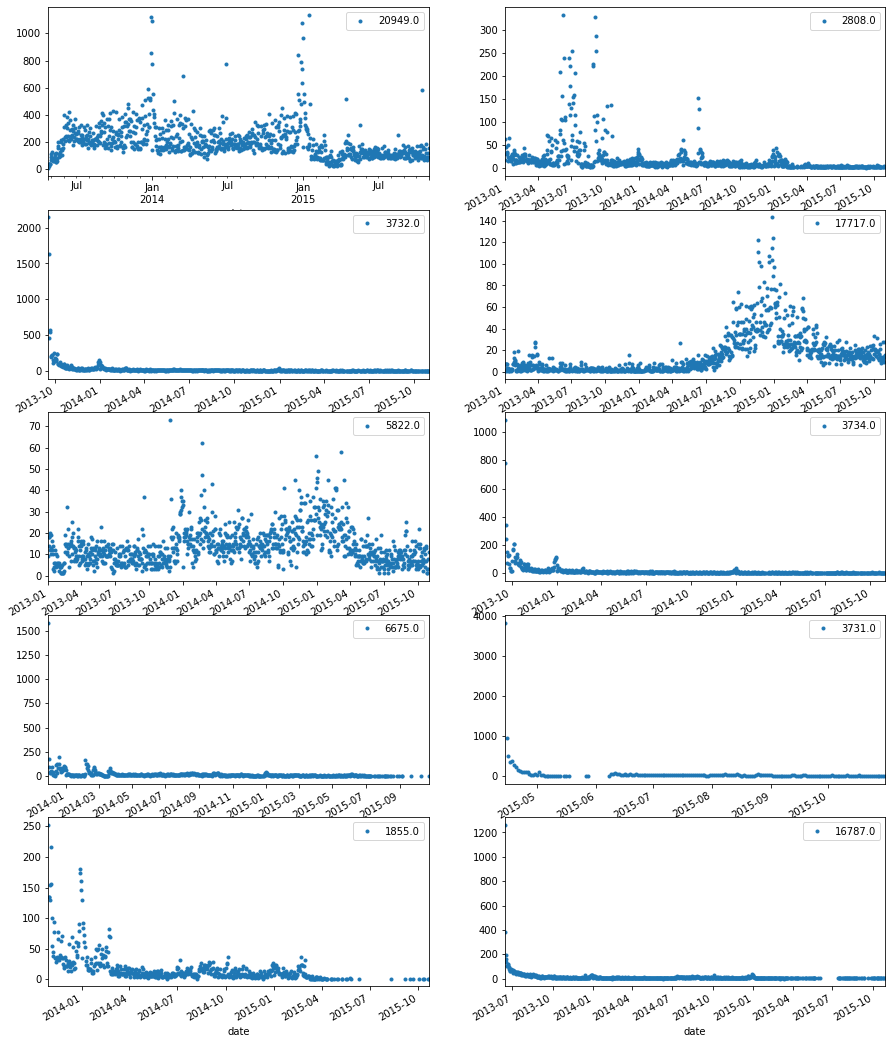

In [6]:
ax = plt.figure(1, figsize=(15, 20))
subplot_index = 1
for index, row in df_sales_totalitem.head(num_of_items_to_plot).iterrows():
    fig = plt.figure(1, figsize=(12, 12))
    ax = fig.add_subplot(num_of_items_to_plot/2, 2, subplot_index)
    subplot_index = subplot_index + 1
    ax = df_sales_day.loc[
        df_sales_day['item_id']==row['item_id']].plot(ax=ax, x='date', y='item_cnt_day_total',
              linestyle='none',  marker='.', 
              label = str(row['item_id']), legend=True, grid=False)

# Plot top 10 items on a Logarithmic Scale

In the last plots, it was difficult to see the rolloff in items 3732 and 3734.  This can be be easier to see on a logarithmic scale.  Logarithmic scales are used in many applications in both Finance and Engineeing (as a decibel scale).

In [7]:
df_sales_day_log = df_sales_day.copy().loc[df_sales_day['item_cnt_day_total']>0]
df_sales_day_log['item_cnt_day_total'] = np.log(df_sales_day_log['item_cnt_day_total'])


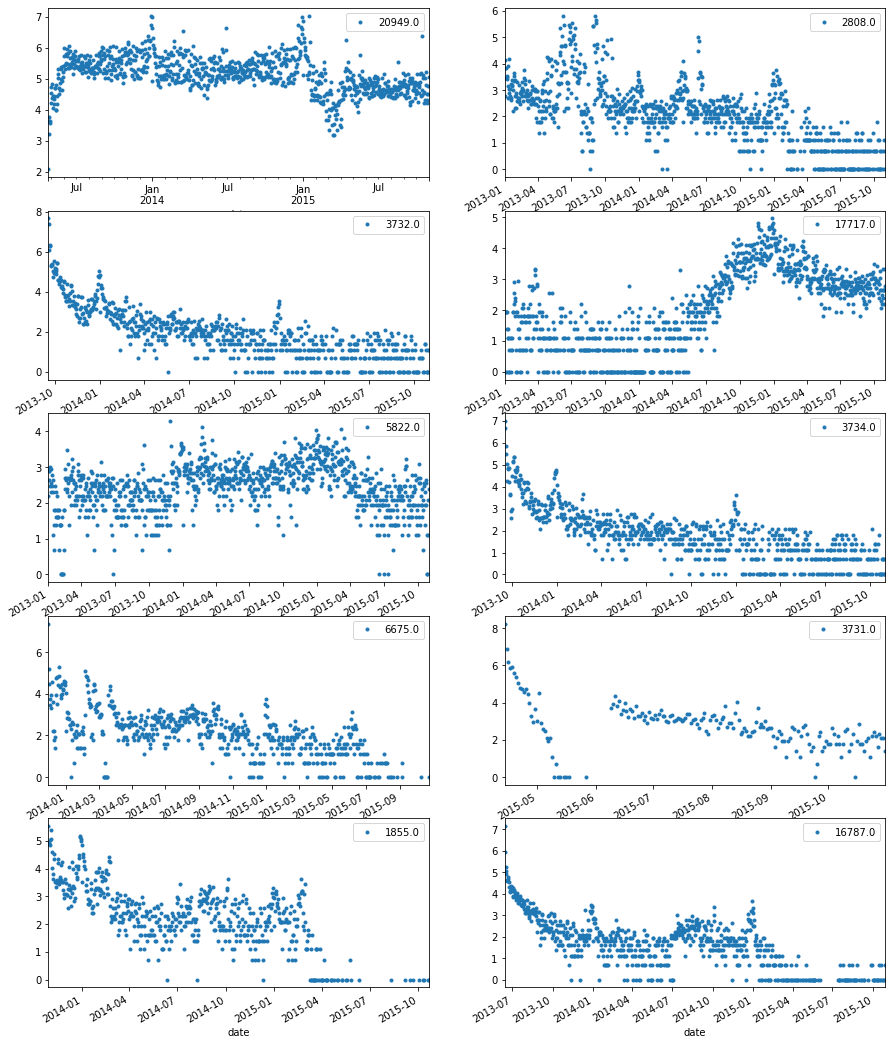

In [8]:
ax = plt.figure(1, figsize=(15, 20))
subplot_index = 1
for index, row in df_sales_totalitem.head(num_of_items_to_plot).iterrows():
    fig = plt.figure(1, figsize=(12, 12))
    ax = fig.add_subplot(num_of_items_to_plot/2, 2, subplot_index)
    subplot_index = subplot_index + 1
    ax = df_sales_day_log.loc[
        df_sales_day_log['item_id']==row['item_id']].plot(ax=ax, x='date', y='item_cnt_day_total',
              linestyle='none',  marker='.', 
              label = str(row['item_id']), legend=True, grid=False)

Once in the logarithmic scale, the changes are more easily visible in the trends over time.  This method isn't perfect, however.  We can see when there is missing data, this could cause problems because the log scale can't really go to zero.  Another problem is when the number of items sold in the day approaches 0, where the plot appears to be almost quantized.

# Plot of Item Price for Single Items

Although we did not use the price to improve our model, the price of the item might help to explain the trends we are seeing in the item sales count over time.

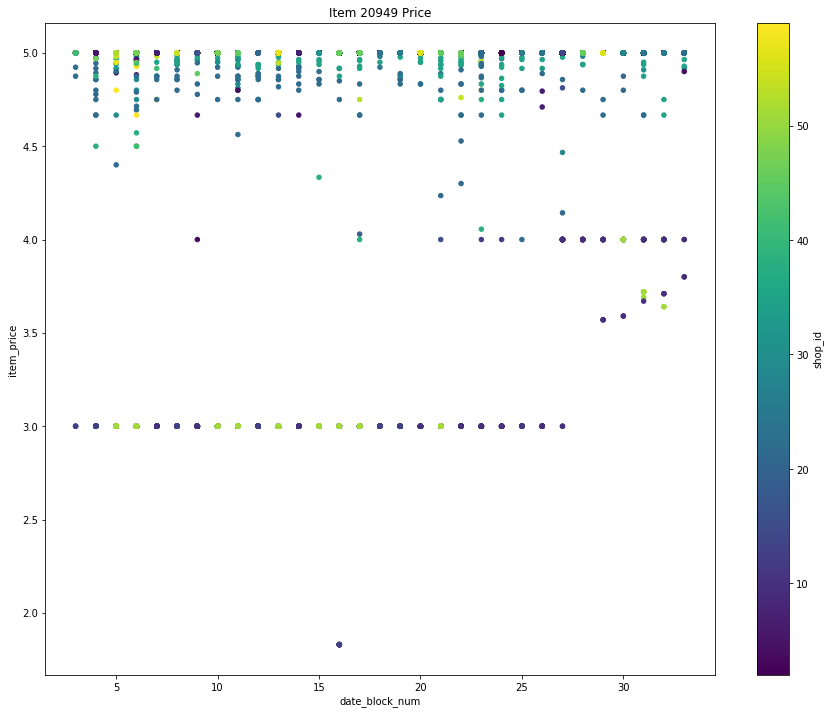

In [9]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==20949)]
df_sales_plot =df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
ax = df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis', title='Item 20949 Price')

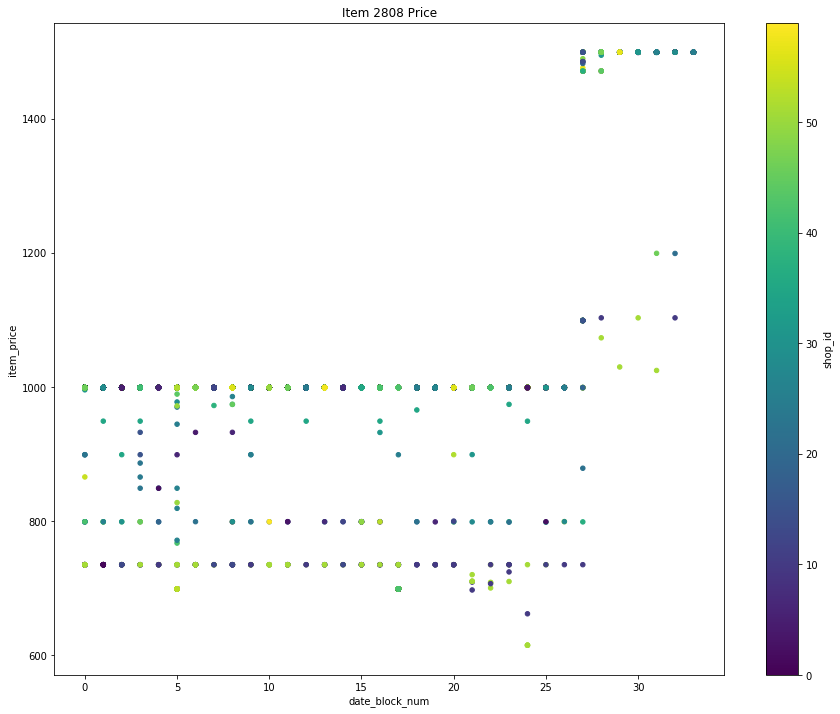

In [10]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==2808)]
df_sales_plot =df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
ax = df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis',title='Item 2808 Price')

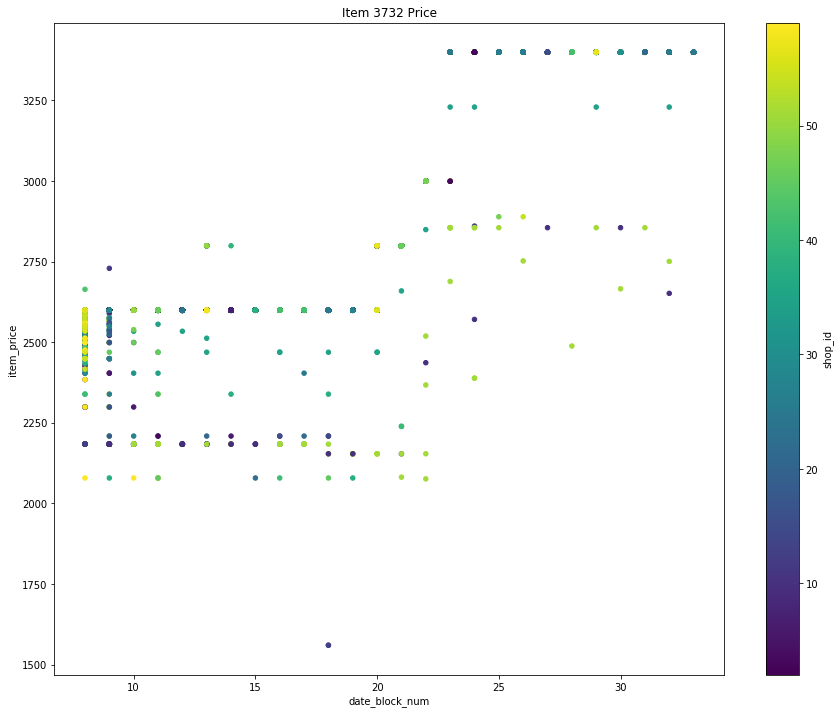

In [11]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==3732)]
df_sales_plot = df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
ax = df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis', title='Item 3732 Price')

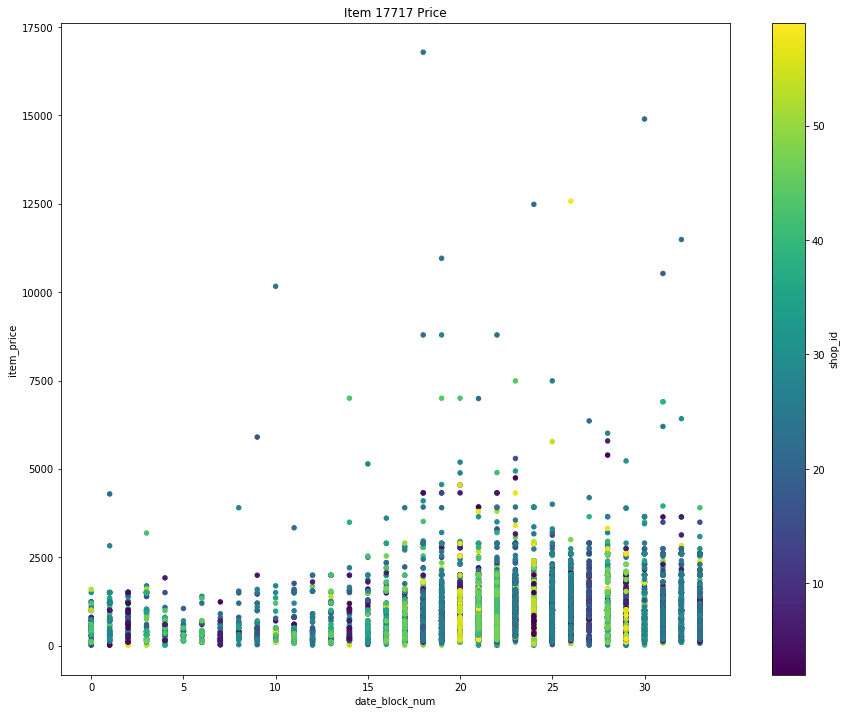

In [12]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==17717)]
df_sales_plot =df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
ax = df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis',title='Item 17717 Price')

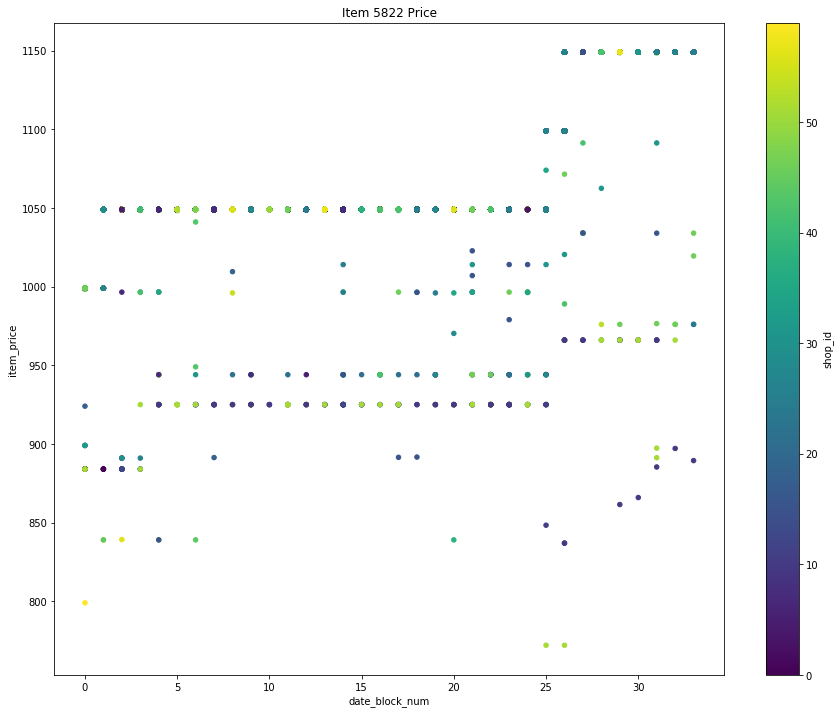

In [13]:
df_sales_shop_price = df_sales.loc[(df_sales['item_cnt_day']>0)&(df_sales['item_id']==5822)]
df_sales_plot =df_sales_shop_price[[ 'date_block_num','shop_id','item_price']]
fig, ax = plt.subplots(figsize=(15,12))
ax = df_sales_plot.plot.scatter(ax=ax,x='date_block_num', y = 'item_price', c='shop_id',colormap='viridis'
                           ,title='Item 5822 Price')

Most items sell at different prices at different times, and surprisingly, many items actually increase over time, such as item 2808, and item 3732.